In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2

In [5]:
print("Enter a number from the given list:\n" +
      "\t FIFO = 1\n \t LIFO = 2\n  " +
      "\t SJF  = 3\n  \t SIRO = 4\n")

que_dis = int(input())
print("Chosen option is "+ str(que_dis))

print("Enter expected delays : ")
expected__delays = int(input())
print(str(expected__delays))


Enter a number from the given list:
	 FIFO = 1
 	 LIFO = 2
  	 SJF  = 3
  	 SIRO = 4

1
Chosen option is 1
Enter expected delays : 
10
10


In [0]:
ar_un_Q_list = []
cus_in_q_list  = []
ar_un_B_list = []
server_stat_list = []
event_list = []


class single_server_q:
    def __init__(self , q_discipline , exp_del):
        np.random.seed(0)

        #self.interarrivals = [0.4, 1.2, 0.5, 1.7, 0.2, 1.6, 0.2, 1.4, 1.9, 0.7]  
        #self.service_times = [2.0, 0.7, 0.2, 1.1, 3.7, 0.6, 0.7, 0.9, 1.2]  
        
        #'''
        self.interarrivals = np.random.exponential(1/3, 150)   #exponential distribution mean 1/3
        self.interarrivals = self.interarrivals.tolist()
        self.service_times = np.random.exponential(1/4, 150)  #exponential distribution mean 1/4
        self.service_times = self.service_times.tolist()
        #'''
        ##testing::
        #self.service_times= [2.0, 0.7, 0.2, 1.1, 3.7, 0.6, 0.8, 0.4, 1.2]
        
        print("Interarrival times = ")
        print(self.interarrivals)
        print("Service times = ")
        print(self.service_times)
        print("\n\n")


        self.queue_discipline = q_discipline
        self.expected_Delays = expected__delays
        self.clock = 0.0

        self.nxt_arv = self.interarrivals.pop(0)
        self.nxt_dprtr = float('inf')

        self.num_of_cstmr_in_q = 0
        self.time_of_arv_q = []
        self.service_time_q = []

        self.total_delay = 0.0
        self.num_of_delays = 0.0
        self.area_under_Q = 0.0
        self.area_under_B = 0.0

        self.server_status = 0              # 0=idel   1=busy
        self.last_event_time = 0.0



    def start_service(self):
        while self.num_of_delays < self.expected_Delays:
            self.timing()
        self.server_performance()


    def timing(self):
        self.clock = min(self.nxt_arv , self.nxt_dprtr)
        self.update_register()

        if self.nxt_arv <= self.nxt_dprtr :
            self.arv()
            print("Arrival at : " + str(self.clock))
        
        else:
            self.dprtr()
            print("Departure at : " + str(self.clock))
        event_list.append(self.clock) ## listinf the event for Qt vs t and Bt vs t graph

        print("Next Arrival Time: "+str(self.nxt_arv))
        print("Next Departure Time: "+str(self.nxt_dprtr))
        print("Server Status: "+str(self.server_status))
        print("Times of arrivals in Queue: "+ str(self.time_of_arv_q))
        print("Service times in Queue: "+str(self.service_time_q))
        print("Total number of Delays: " +str(self.num_of_delays))
        print("Total Delay: " +str(self.total_delay))
        print("Area under Q: "+ str(self.area_under_Q))
        print("Area under B: "+ str(self.area_under_B))
        print()


    def arv(self):
        # get the next arraival time from list
        self.nxt_arv += self.interarrivals.pop(0)

        if self.server_status == 0:   #server idle
            self.server_status = 1
            delay = 0.0
            self.total_delay += delay
            self.num_of_delays += 1

            self.nxt_dprtr = self.clock + self.service_times.pop(0)
        
        else:  #server busy
            self.num_of_cstmr_in_q += 1
            
            self.time_of_arv_q.append(self.clock)
            self.service_time_q.append(self.service_times.pop(0))


    def dprtr(self):
        if self.num_of_cstmr_in_q == 0:     #if queue is empty
            self.server_status = 0
            self.nxt_dprtr = float('inf')

        else:           #if queue is NOT empty
            self.num_of_cstmr_in_q -=1
            self.num_of_delays += 1

            ## FIFO
            if self.queue_discipline == 1:
                self.nxt_dprtr = self.clock + self.service_time_q.pop(0)
                arrival = self.time_of_arv_q.pop(0)
                delay = self.clock - arrival
                self.total_delay += delay
            
            ## LIFO
            elif self.queue_discipline == 2:
                self.nxt_dprtr = self.clock + self.service_time_q.pop(-1)
                arrival = self.time_of_arv_q.pop(-1)
                delay = self.clock - arrival
                self.total_delay += delay
                
            
            ## SJF
            elif self.queue_discipline == 3:
                index_of_smallest_service_time = self.service_time_q.index( min(self.service_time_q) )
                
                self.nxt_dprtr = self.clock + self.service_time_q.pop(index_of_smallest_service_time)
                arrival = self.time_of_arv_q.pop(index_of_smallest_service_time)
                delay = self.clock - arrival
                self.total_delay += delay
                
            ## SIRO
            elif self.queue_discipline == 4:
                index_of_random_service_time =  self.service_time_q.index( np.random.choice(self.service_time_q) )           

                self.nxt_dprtr = self.clock + self.service_time_q.pop(index_of_random_service_time)
                arrival = self.time_of_arv_q.pop(index_of_random_service_time)
                delay = self.clock - arrival
                self.total_delay += delay
                

    def update_register(self):
        time_differnce = self.clock - self.last_event_time
        self.area_under_Q += self.num_of_cstmr_in_q * time_differnce
        self.area_under_B += self.server_status * time_differnce
        self.last_event_time = self.clock

        ar_un_Q_list.append(self.area_under_Q)
        cus_in_q_list.append(self.num_of_cstmr_in_q)

        ar_un_B_list.append(self.area_under_B)
        server_stat_list.append(self.server_status)


    def server_performance(self):
        if self.queue_discipline == 1:
            print("\n\n----------Using FIFO----------")
        elif self.queue_discipline == 2:
            print("\n\n----------Using LIFO----------")
        elif self.queue_discipline == 3:
            print("\n\n----------Using SJF----------")
        elif self.queue_discipline == 4:
            print("\n\n----------Using SIRO----------")
        print("\n\nAvg delay: " + str(self.total_delay / self.num_of_delays))
        print("Expected Number of Customers in the queue: " + str(self.area_under_Q / self.last_event_time))
        print("Expected Utilization of the server: " + str( self.area_under_B / self.last_event_time))



In [7]:

ssq = single_server_q(que_dis , expected__delays)
ssq.start_service()


print("\n\n")
print(event_list)
print()
print(ar_un_Q_list)
print(cus_in_q_list)
print()
print(ar_un_B_list)
print(server_stat_list)


Interarrival times = 
[0.26529150272103663, 0.41864358765527926, 0.30774104860135626, 0.2624003841057569, 0.18368283036516642, 0.34605309831453646, 0.19183973305621327, 0.7411748043442189, 1.1049707273512712, 0.1612007003007511, 0.5229653799897227, 0.25089136984552945, 0.27981094891294095, 0.8660847179751469, 0.02456178497094929, 0.03038700970633349, 0.00680852889474165, 0.5958292265382961, 0.5019280772884052, 0.6801047603151835, 1.281740612722283, 0.5350798529833819, 0.20630981953765617, 0.5055119922933838, 0.04195813727684759, 0.3404772954640243, 0.051576560909215065, 0.9648068165638419, 0.24594242610368622, 0.1785219061002521, 0.10242678436348458, 0.496084946242245, 0.20302747210102834, 0.28011156895587064, 0.00632285722079463, 0.32046030973161976, 0.31566555928125933, 0.3198493242430786, 0.9593050262470078, 0.38171298621679206, 0.1485061642437464, 0.19151080291916103, 0.39870260037779004, 0.020705098641771898, 0.3663041600193465, 0.3701991444314601, 0.07873556844466925, 0.046009562

([<matplotlib.axis.XTick at 0x7f240b4115c0>,
 <a list of 19 Text major ticklabel objects>)

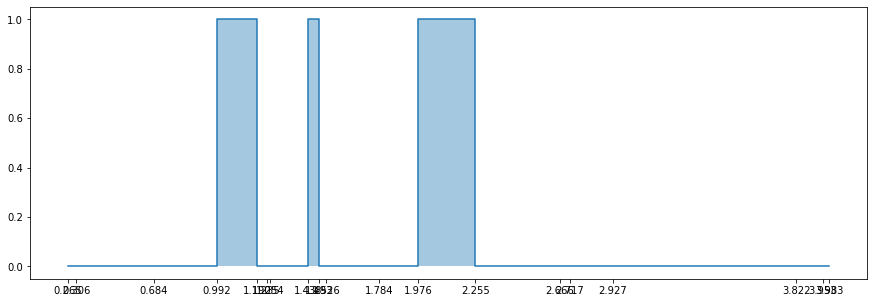

In [8]:
x=event_list
y=cus_in_q_list
y2=server_stat_list

plt.figure(figsize=(15,5))

plt.fill_between(x,y, step="pre", alpha=0.4)
plt.step(x, y)
plt.xticks(x)

([<matplotlib.axis.XTick at 0x7f240aeb4208>,
 <a list of 19 Text major ticklabel objects>)

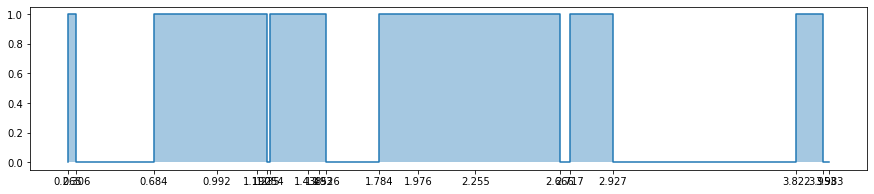

In [9]:
plt2.figure(figsize=(15,3))
plt2.fill_between(x,y2, step="pre", alpha=0.4)
plt2.step(x , y2)
plt2.xticks(x) 